# Combined Simulations

In [1]:
import os
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.interpolate import griddata

mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'Arial' 
mpl.rcParams['axes.labelsize'] = 12  # x and y labels size
mpl.rcParams['legend.fontsize'] = 12  # Legend size
mpl.rcParams['xtick.labelsize'] = 12  # x tick label size
mpl.rcParams['ytick.labelsize'] = 12  # y tick label size

plot_dir = "../plots/"

filename = "../combined_simulation_data_batch_individual_cr_3.csv"

df = pd.read_csv(filename)

df = df.rename(columns={'AIC Quadratic (Minimum)': 'AIC Quartic (Minimum)'})

df.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,capacity_gen_ai,creativity_gen_ai,learning_rate_customer,learning_rate_gen_ai,num_customers,num_products,num_retailers,percentage_willing_to_share_info,purchase_threshold,total_steps,...,Average Seller Rating,Average Satisfaction,Willing to Share Customers,Unwilling to Share Customers,Number of Products,mean_viewed_comments,mean_purchase_position,creativity_gen_ai.1,AIC Quartic (Sum),AIC Quartic (Minimum)
0,0.0,0.1,1,0.8,100,100,20,1,1.5,100,...,2.307897,3.670292,100,0,100,3.0,24.121500,0.0,-207.043193,-301.925763
1,0.0,0.1,2,0.1,100,100,20,1,1.5,100,...,2.967753,3.526479,100,0,100,3.0,24.821833,0.0,-112.190923,-396.357403
2,0.0,0.1,1,0.5,100,100,20,1,1.5,100,...,2.792785,2.762262,100,0,100,3.0,27.998000,0.0,-17.310880,-54.818807
3,0.0,0.1,1,0.4,100,100,20,1,1.5,100,...,2.846723,3.207314,100,0,100,3.0,24.167667,0.0,-164.206165,-231.310775
4,0.0,0.1,1,0.2,100,100,20,1,1.5,100,...,0.496000,0.191745,100,0,100,3.0,53.734500,0.0,-25.511220,-72.723510


In [2]:
df.loc[df['capacity_gen_ai'] == 0, 'percentage_willing_to_share_info'] = 0

# df.loc[df['percentage_willing_to_share_info'] == 0, 'creativity_gen_ai'] = 0
# df.loc[df['percentage_willing_to_share_info'] == 0, 'learning_rate_gen_ai'] = 0

# select columns
df_select = df[['total_steps','mean_purchase_position', 'Average Satisfaction', 'learning_rate_gen_ai', 'capacity_gen_ai','creativity_gen_ai', 'percentage_willing_to_share_info', 'num_customers', 'num_retailers', 'num_products','AIC Quartic (Sum)', 'AIC Quartic (Minimum)', 'Average Seller Rating']]

df_select.replace([-np.inf, np.inf], np.nan, inplace=True)

df_select.dropna(inplace=True)

/var/folders/lx/qwfk5l855bq3cnpg8br590200000gn/T/ipykernel_676/4220402881.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.replace([-np.inf, np.inf], np.nan, inplace=True)
/var/folders/lx/qwfk5l855bq3cnpg8br590200000gn/T/ipykernel_676/4220402881.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.dropna(inplace=True)


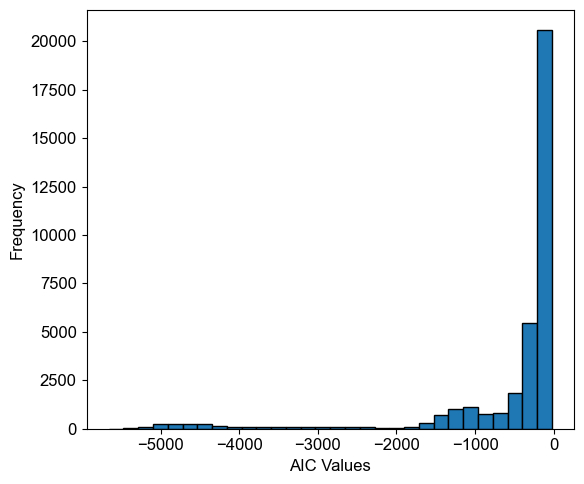

In [3]:
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'Arial'  # Ensuring font is Times New Roman
mpl.rcParams['axes.labelsize'] = 12  # x and y labels size
mpl.rcParams['legend.fontsize'] = 12  # Legend size
mpl.rcParams['xtick.labelsize'] = 12  # x tick label size
mpl.rcParams['ytick.labelsize'] = 12  # y tick label size
# Plotting the distribution of 'aic_quartic_original'
plt.figure(figsize=(6, 5))
plt.hist(df_select['AIC Quartic (Minimum)'], bins=30, edgecolor='k')
plt.xlabel('AIC Values')
plt.ylabel('Frequency')

plt.tight_layout()

plot_title = "Distribution of Original AIC Values.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight', dpi=300)


In [4]:
# Remove rows where 'aic_quartic_original' is less than -450
df_select = df_select[df_select['AIC Quartic (Minimum)'] >= -1000]

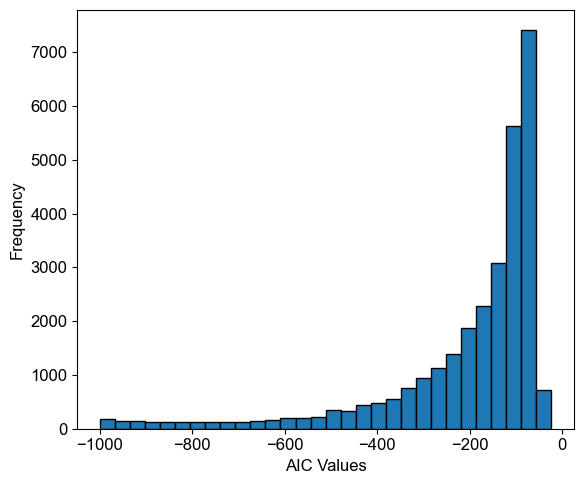

In [5]:
# Plotting the distribution of 'aic_quartic_original'
plt.figure(figsize=(6, 5))
plt.hist(df_select['AIC Quartic (Minimum)'], bins=30, edgecolor='k')
plt.xlabel('AIC Values')
plt.ylabel('Frequency')
plt.tight_layout()

plot_title = "Distribution of Filtered AIC Values.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight', dpi=300)

In [6]:
# Group the data by 'learning_rate_gen_ai', 'capacity_gen_ai', and 'creativity_gen_ai'
grouped_df_test = df_select.groupby(['capacity_gen_ai']).agg({
    'AIC Quartic (Sum)': 'mean',
    'AIC Quartic (Minimum)': 'mean',
    'Average Satisfaction': 'mean',
    'Average Seller Rating': 'mean',
}).reset_index()

# Print the head of the grouped DataFrame to check the results
grouped_df_test.head(11)


,capacity_gen_ai,AIC Quartic (Sum),AIC Quartic (Minimum),Average Satisfaction,Average Seller Rating
0,0.0,-68.449024,-151.918121,1.456959,1.498498
1,0.1,-71.995543,-150.098651,1.663294,1.774479
2,0.2,-86.809683,-158.118646,2.008704,2.115348
3,0.3,-91.997073,-163.720493,2.199316,2.331763
4,0.4,-110.138282,-183.366493,2.469474,2.554998
5,0.5,-121.352291,-194.990069,2.677411,2.720277
6,0.6,-140.398818,-219.643707,2.875813,2.850016
7,0.7,-158.186160,-244.077732,3.010860,2.945687
8,0.8,-168.646167,-263.662088,3.097940,2.999493
9,0.9,-178.862235,-273.323681,3.147629,3.049719


In [7]:
# Group the data by 'learning_rate_gen_ai', 'capacity_gen_ai', and 'creativity_gen_ai'
grouped_df_test = df_select.groupby(['creativity_gen_ai']).agg({
    'AIC Quartic (Sum)': 'mean',
    'AIC Quartic (Minimum)': 'mean',
    'Average Satisfaction': 'mean',
    'Average Seller Rating': 'mean',
}).reset_index()

# Print the head of the grouped DataFrame to check the results
grouped_df_test.head(11)

,creativity_gen_ai,AIC Quartic (Sum),AIC Quartic (Minimum),Average Satisfaction,Average Seller Rating
0,0.1,-121.038179,-196.230575,2.188368,2.228382
1,0.2,-118.050472,-192.638513,2.262533,2.313446
2,0.3,-120.241773,-197.419252,2.359893,2.391330
3,0.4,-118.158906,-196.250778,2.432336,2.453472
4,0.5,-122.030350,-200.596398,2.516487,2.544285
5,0.6,-126.114458,-211.304231,2.581696,2.597574
6,0.7,-125.013501,-212.833977,2.673304,2.662255
7,0.8,-127.978775,-219.228832,2.751379,2.726421
8,0.9,-128.775532,-222.138305,2.792062,2.758076


In [8]:
# Group the data by 'learning_rate_gen_ai', 'capacity_gen_ai', and 'creativity_gen_ai'
grouped_df_test_2 = df_select.groupby(['learning_rate_gen_ai']).agg({
    'AIC Quartic (Sum)': 'mean',
    'AIC Quartic (Minimum)': 'mean',
    'Average Satisfaction': 'mean',
    'Average Seller Rating': 'mean',
}).reset_index()

# Print the head of the grouped DataFrame to check the results
grouped_df_test_2.head(50)

,learning_rate_gen_ai,AIC Quartic (Sum),AIC Quartic (Minimum),Average Satisfaction,Average Seller Rating
0,0.1,-83.131541,-167.045862,2.100724,2.051301
1,0.2,-89.067246,-167.441535,2.208541,2.216703
2,0.3,-105.415139,-184.117913,2.378054,2.380171
3,0.4,-119.788592,-198.909938,2.464274,2.494774
4,0.5,-123.372519,-200.809167,2.499805,2.550167
5,0.6,-131.880740,-209.194240,2.582574,2.651188
6,0.7,-149.033661,-233.435112,2.725653,2.744174
7,0.8,-155.754806,-247.995085,2.817971,2.821022
8,0.9,-153.503910,-243.937651,2.820019,2.805392


In [9]:
# rows_to_duplicate = grouped_df[grouped_df['percentage_willing_to_share_info'] == 0]
rows_to_duplicate = df_select[df_select['percentage_willing_to_share_info'] == 0]

duplicated_rows = pd.concat([rows_to_duplicate], ignore_index=True)

df_extended = pd.concat([df_select, duplicated_rows], ignore_index=True)


# Data Normalization

In [10]:
df_extended['AIC Quartic (Minimum) Original'] = df_extended['AIC Quartic (Minimum)']
columns_to_scale = ['Average Satisfaction', 'mean_purchase_position','percentage_willing_to_share_info', 'num_customers', 'num_retailers', 'num_products', 'AIC Quartic (Sum)', 'AIC Quartic (Minimum)', 'Average Seller Rating']
scaler = MinMaxScaler()
df_extended[columns_to_scale] = scaler.fit_transform(df_extended[columns_to_scale])
data_normalized_df = df_extended

# Split learning_rate_gen_ai

In [11]:
# Determine the minimum and maximum values of the 'learning_rate_gen_ai' column
min_value = data_normalized_df['learning_rate_gen_ai'].min()
max_value = data_normalized_df['learning_rate_gen_ai'].max()

# Calculate the range for each segment (low, medium, high)
range_per_part = (max_value - min_value) / 3

# Define thresholds for low, medium, and high categories
low_threshold = 0.3
medium_threshold = 0.6

# Creating new columns for low, medium, and high learning rates
# Assigning 1 if the condition is true, else 0
data_normalized_df['Learning Rate Low'] = (data_normalized_df['learning_rate_gen_ai'] <= low_threshold).astype(int)
data_normalized_df['Learning Rate Medium'] = ((data_normalized_df['learning_rate_gen_ai'] > low_threshold) & (data_normalized_df['learning_rate_gen_ai'] <= medium_threshold)).astype(int)
data_normalized_df['Learning Rate High'] = (data_normalized_df['learning_rate_gen_ai'] > medium_threshold).astype(int)

# Split creativity_gen_ai

In [12]:
# Determine the minimum and maximum values of the 'creativity_gen_ai' column
min_creativity = data_normalized_df['creativity_gen_ai'].min()
max_creativity = data_normalized_df['creativity_gen_ai'].max()

# Calculate the range for each segment (low, medium, high) for 'creativity_gen_ai'
creativity_range_per_part = (max_creativity - min_creativity) / 3

# Define thresholds for low, medium, and high categories for 'creativity_gen_ai'
low_creativity_threshold = min_creativity + creativity_range_per_part
medium_creativity_threshold = min_creativity + 2 * creativity_range_per_part

# Creating new columns for low, medium, and high creativity rates
# Assigning 1 if the condition is true, else 0
data_normalized_df['Creativity Low'] = (data_normalized_df['creativity_gen_ai'] <= low_creativity_threshold).astype(int)
data_normalized_df['Creativity Medium'] = ((data_normalized_df['creativity_gen_ai'] > low_creativity_threshold) & (data_normalized_df['creativity_gen_ai'] <= medium_creativity_threshold)).astype(int)
data_normalized_df['Creativity High'] = (data_normalized_df['creativity_gen_ai'] > medium_creativity_threshold).astype(int)

# Split capacity_gen_ai

In [13]:
# Calculate minimum and maximum values of the 'capacity_gen_ai' column
min_capacity = data_normalized_df['capacity_gen_ai'].min()
max_capacity = data_normalized_df['capacity_gen_ai'].max()

# Calculate the range for each segment (low, medium, high) for 'capacity_gen_ai'
capacity_range_per_part = (max_capacity - min_capacity) / 3

# Define thresholds for low, medium, and high categories for 'capacity_gen_ai'
low_capacity_threshold = min_capacity + capacity_range_per_part
medium_capacity_threshold = min_capacity + 2 * capacity_range_per_part

# Creating new columns for low, medium, and high capacity rates
# Assigning 1 if the condition is true, else 0
data_normalized_df['Capacity Low'] = (data_normalized_df['capacity_gen_ai'] <= low_capacity_threshold).astype(int)
data_normalized_df['Capacity Medium'] = ((data_normalized_df['capacity_gen_ai'] > low_capacity_threshold) & (data_normalized_df['capacity_gen_ai'] <= medium_capacity_threshold)).astype(int)
data_normalized_df['Capacity High'] = (data_normalized_df['capacity_gen_ai'] > medium_capacity_threshold).astype(int)

In [14]:
# rename columns
data = data_normalized_df.rename(columns={
    'Average Satisfaction': 'avg_buyer_fitness',
    'Average Seller Rating': 'avg_seller_fitness',
    'percentage_willing_to_share_info': 'implement_gen_ai',
    'num_customers': 'n_customer',
    'num_retailers': 'n_seller',
    'num_products': 'n_product',
    'mean_purchase_position': 'mean_purchase_position',
    'AIC Quartic (Minimum)': 'aic_quartic_min',
    'AIC Quartic (Minimum) Original': 'aic_quartic_min_org',
    'AIC Quartic (Sum)': 'aic_quartic_sum'
})

data.head(10)

,total_steps,mean_purchase_position,avg_buyer_fitness,learning_rate_gen_ai,capacity_gen_ai,creativity_gen_ai,implement_gen_ai,n_customer,n_seller,n_product,...,aic_quartic_min_org,Learning Rate Low,Learning Rate Medium,Learning Rate High,Creativity Low,Creativity Medium,Creativity High,Capacity Low,Capacity Medium,Capacity High
0,100,0.299418,0.762385,0.8,0.0,0.1,0.0,0.0,0.0,0.0,...,-301.925763,0,0,1,1,0,0,1,0,0
1,100,0.313239,0.732509,0.1,0.0,0.1,0.0,0.0,0.0,0.0,...,-396.357403,1,0,0,1,0,0,1,0,0
2,100,0.375923,0.573750,0.5,0.0,0.1,0.0,0.0,0.0,0.0,...,-54.818807,0,1,0,1,0,0,1,0,0
3,100,0.300329,0.666206,0.4,0.0,0.1,0.0,0.0,0.0,0.0,...,-231.310775,0,1,0,1,0,0,1,0,0
4,100,0.883846,0.039750,0.2,0.0,0.1,0.0,0.0,0.0,0.0,...,-72.723510,1,0,0,1,0,0,1,0,0
5,100,0.553306,0.435685,0.1,0.0,0.1,0.0,0.0,0.0,0.0,...,-88.682348,1,0,0,1,0,0,1,0,0
6,100,0.903937,0.037238,0.9,0.0,0.1,0.0,0.0,0.0,0.0,...,-68.202686,0,0,1,1,0,0,1,0,0
7,100,0.896717,0.009068,0.6,0.0,0.1,0.0,0.0,0.0,0.0,...,-112.371364,0,1,0,1,0,0,1,0,0
8,100,0.475692,0.487373,0.3,0.0,0.1,0.0,0.0,0.0,0.0,...,-74.485347,1,0,0,1,0,0,1,0,0
9,100,0.726386,0.145118,0.7,0.0,0.1,0.0,0.0,0.0,0.0,...,-62.592388,0,0,1,1,0,0,1,0,0


In [15]:
# Selecting the independent variables/features for the model
X = data[['learning_rate_gen_ai', 'creativity_gen_ai','capacity_gen_ai']]
# X = data[['learning_rate_gen_ai', 'creativity_gen_ai','capacity_gen_ai', 'mean_purchase_position']]
# X = data[['learning_rate_gen_ai', 'creativity_gen_ai','capacity_gen_ai', 'n_customer', 'n_seller', 'n_product']]
# X = data[['learning_rate_gen_ai', 'creativity_gen_ai','capacity_gen_ai']]


# Adding a constant to the model (intercept)

X = sm.add_constant(X)
# Selecting the dependent variable/target
y = data['aic_quartic_min']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# print model
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:        aic_quartic_min   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     1005.
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        11:40:49   Log-Likelihood:                 9091.5
No. Observations:               32218   AIC:                        -1.817e+04
Df Residuals:                   32214   BIC:                        -1.814e+04
Df Model:                           3                                         
Covariance Type:            nonrobust  

In [16]:
# Selecting the independent variables/features for the model
X = data[['learning_rate_gen_ai', 'creativity_gen_ai','capacity_gen_ai', 'avg_buyer_fitness']]
# X = data[['learning_rate_gen_ai', 'creativity_gen_ai','capacity_gen_ai', 'mean_purchase_position']]
# X = data[['learning_rate_gen_ai', 'creativity_gen_ai','capacity_gen_ai', 'n_customer', 'n_seller', 'n_product']]
# X = data[['learning_rate_gen_ai', 'creativity_gen_ai','capacity_gen_ai']]


# Adding a constant to the model (intercept)

X = sm.add_constant(X)
# Selecting the dependent variable/target
y = data['aic_quartic_min']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# print model
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:        aic_quartic_min   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     2302.
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        11:40:49   Log-Likelihood:                 11700.
No. Observations:               32218   AIC:                        -2.339e+04
Df Residuals:                   32213   BIC:                        -2.335e+04
Df Model:                           4                                         
Covariance Type:            nonrobust  

In [17]:
from semopy import Model

model_desc = """
    mean_purchase_position ~ learning_rate_gen_ai + creativity_gen_ai + capacity_gen_ai
    aic_quartic_min ~ mean_purchase_position + learning_rate_gen_ai + creativity_gen_ai + capacity_gen_ai
"""

model = Model(model_desc)
result = model.fit(data)

model.inspect()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,mean_purchase_position,~,learning_rate_gen_ai,-0.172812,0.004641,-37.234968,0.000000
1,mean_purchase_position,~,creativity_gen_ai,-0.107879,0.004639,-23.254507,0.000000
2,mean_purchase_position,~,capacity_gen_ai,-0.327696,0.003700,-88.575728,0.000000
3,aic_quartic_min,~,mean_purchase_position,0.311981,0.004412,70.716425,0.000000
4,aic_quartic_min,~,learning_rate_gen_ai,-0.056183,0.003753,-14.968503,0.000000
5,aic_quartic_min,~,creativity_gen_ai,-0.006899,0.003704,-1.862430,0.062542
6,aic_quartic_min,~,capacity_gen_ai,-0.046820,0.003267,-14.331550,0.000000
7,mean_purchase_position,~~,mean_purchase_position,0.045979,0.000362,126.921235,0.000000
8,aic_quartic_min,~~,aic_quartic_min,0.028832,0.000227,126.921235,0.000000


In [18]:
# Selecting the independent variables/features for the model
# X = data[['learning_rate_gen_ai', 'creativity_gen_ai','capacity_gen_ai','n_customer', 'n_seller', 'n_product']]
X = data[['learning_rate_gen_ai', 'creativity_gen_ai','capacity_gen_ai']]

X = sm.add_constant(X)
y = data['avg_buyer_fitness']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# print model
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:      avg_buyer_fitness   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     3349.
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        11:40:49   Log-Likelihood:                -869.25
No. Observations:               32218   AIC:                             1747.
Df Residuals:                   32214   BIC:                             1780.
Df Model:                           3                                         
Covariance Type:            nonrobust  

In [19]:
# Selecting the independent variables/features for the model
# X = data[['learning_rate_gen_ai', 'creativity_gen_ai','capacity_gen_ai','n_customer', 'n_seller', 'n_product']]
X = data[['learning_rate_gen_ai', 'creativity_gen_ai','capacity_gen_ai']]

X = sm.add_constant(X)
y = data['avg_seller_fitness']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# print model
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:     avg_seller_fitness   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3948.
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        11:40:49   Log-Likelihood:                 5548.2
No. Observations:               32218   AIC:                        -1.109e+04
Df Residuals:                   32214   BIC:                        -1.105e+04
Df Model:                           3                                         
Covariance Type:            nonrobust  

# Interaction Effects of Learning Rate, Creativity and Capacity of Gen AI on AIC Quartic Values

In [20]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [21]:
df_select = data[
    data['creativity_gen_ai'].isin([0.1, 0.5, 0.9]) &
    data['capacity_gen_ai'].isin([0.1, 0.5, 0.8, 0.9])&
    data['learning_rate_gen_ai'].isin([0.1, 0.5, 0.9])
]

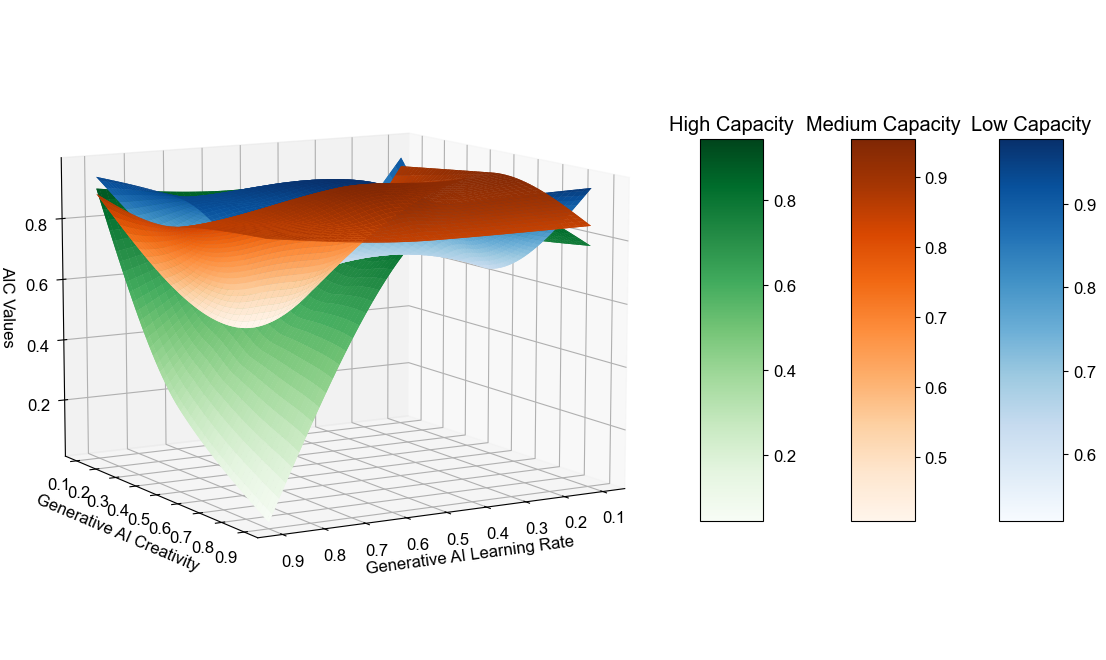

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.lines as mlines
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'Arial'  # Ensuring font is Times New Roman
mpl.rcParams['axes.labelsize'] = 12  # x and y labels size
mpl.rcParams['legend.fontsize'] = 12  # Legend size
mpl.rcParams['xtick.labelsize'] = 12  # x tick label size
mpl.rcParams['ytick.labelsize'] = 12  # y tick label size


fig = plt.figure(figsize=(12, 8)) 
ax = fig.add_subplot(111, projection='3d')

cmaps = ['Blues', 'Oranges', 'Greens'] # Different color maps for each category

# Loop through each learning rate condition
for i, rate in enumerate(['Capacity Low', 'Capacity Medium', 'Capacity High']):
    # Filtering data based on the learning rate
    subset = df_select[df_select[rate] == 1]

    # Extracting data for the axes
    x = subset['learning_rate_gen_ai']
    y = subset['creativity_gen_ai']
    z = subset['aic_quartic_min']

    # Creating a grid to interpolate
    xi = np.linspace(0.1, x.max(), 100)
    yi = np.linspace(0.1, y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='cubic')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Adding a color bar for each surface and setting a title for it
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=6, pad=0.03*i)
    cbar.ax.set_title(rate.split()[1]+ " Capacity")  # Set title for each color bar

ax.view_init(elev=10, azim=-120)


# Setting labels for each axis
ax.set_xlabel('Generative AI Learning Rate')
ax.set_ylabel('Generative AI Creativity')
ax.set_zlabel('AIC Values')

# Inverting X axes
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_ylim(ax.get_ylim()[::-1])

#ticks = np.arange(0.1, 1.0, 0.1)
#tick_labels = [f"{tick:.1f}" if i % 2 == 0 else '' for i, tick in enumerate(ticks)]

#ax.set_xticks(ticks)
#ax.set_xticklabels(tick_labels)

#ax.set_yticks(ticks)
#ax.set_yticklabels(tick_labels)

plt.tight_layout()

plot_title = "Interaction Effects of Learning Rate, Creativity and Capacity of Generative AI on AIC Values.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight', dpi=300)

# Interaction Effects of Learning Rate, Creativity and Capacity of Gen AI on Customer Satisfaction

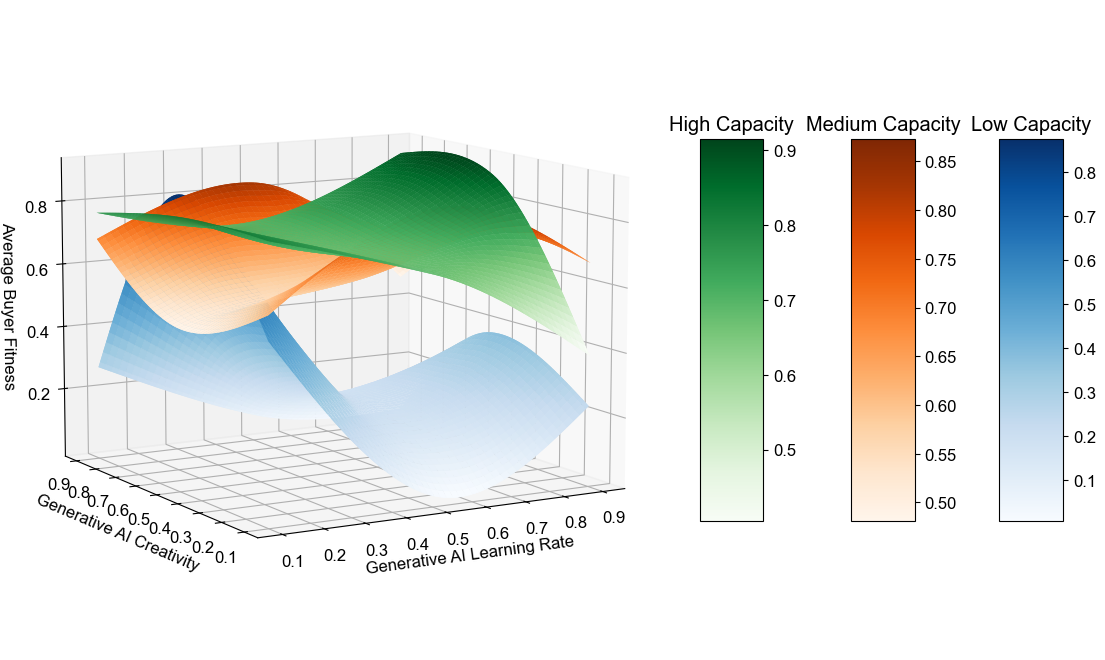

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.lines as mlines


fig = plt.figure(figsize=(12, 8)) 
ax = fig.add_subplot(111, projection='3d')

cmaps = ['Blues', 'Oranges', 'Greens'] # Different color maps for each category

# Loop through each learning rate condition
for i, rate in enumerate(['Capacity Low', 'Capacity Medium', 'Capacity High']):
    # Filtering data based on the learning rate
    subset = df_select[df_select[rate] == 1]

    # Extracting data for the axes
    x = subset['learning_rate_gen_ai']
    y = subset['creativity_gen_ai']
    z = subset['avg_buyer_fitness']

    # Creating a grid to interpolate
    xi = np.linspace(0.1, x.max(), 100)
    yi = np.linspace(0.1, y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='cubic')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Adding a color bar for each surface and setting a title for it
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=6, pad=0.03*i)
    cbar.ax.set_title(rate.split()[1]+ " Capacity")  # Set title for each color bar

ax.view_init(elev=10, azim=-120)


# Setting labels for each axis
ax.set_xlabel('Generative AI Learning Rate')
ax.set_ylabel('Generative AI Creativity')
ax.set_zlabel('Average Buyer Fitness')

# Inverting X axes
# ax.set_xlim(ax.get_xlim()[::-1])
# ax.set_ylim(ax.get_ylim()[::-1])
plt.tight_layout()

plot_title = "Interaction Effects of Learning Rate, Creativity and Capacity of Generative AI on Average Buyer Fitness.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight', dpi=300)

# Interaction Effects of Learning Rate, Creativity and Capacity of Gen AI on Seller Rating

In [24]:
df_select = data[
    data['creativity_gen_ai'].isin([0.1, 0.5, 0.9]) &
    data['capacity_gen_ai'].isin([0.1, 0.5, 0.9])&
    data['learning_rate_gen_ai'].isin([0.1, 0.5, 0.9])
]

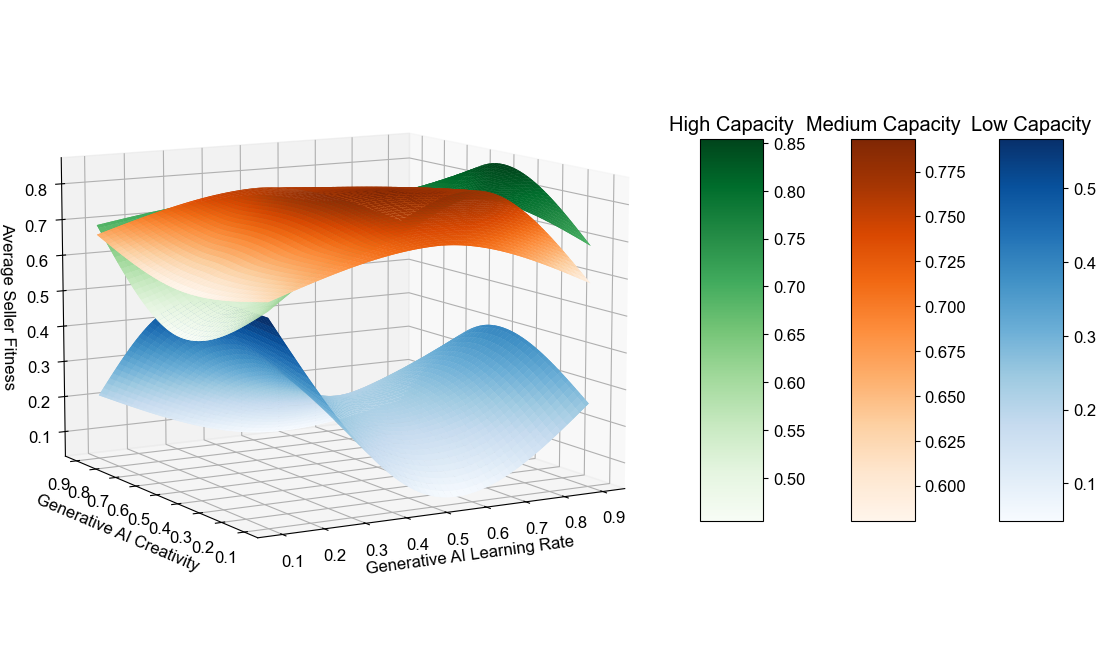

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.lines as mlines



fig = plt.figure(figsize=(12, 8)) 
ax = fig.add_subplot(111, projection='3d')

cmaps = ['Blues', 'Oranges', 'Greens'] # Different color maps for each category

# Loop through each learning rate condition
for i, rate in enumerate(['Capacity Low', 'Capacity Medium', 'Capacity High']):
    # Filtering data based on the learning rate
    subset = df_select[df_select[rate] == 1]

    # Extracting data for the axes
    x = subset['learning_rate_gen_ai']
    y = subset['creativity_gen_ai']
    z = subset['avg_seller_fitness']

    # Creating a grid to interpolate
    xi = np.linspace(0.1, x.max(), 100)
    yi = np.linspace(0.1, y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='cubic')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Adding a color bar for each surface and setting a title for it
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=6, pad=0.03*i)
    cbar.ax.set_title(rate.split()[1]+ " Capacity")  # Set title for each color bar

ax.view_init(elev=10, azim=-120)


# Setting labels for each axis
ax.set_xlabel('Generative AI Learning Rate')
ax.set_ylabel('Generative AI Creativity')
ax.set_zlabel('Average Seller Fitness')

# Inverting X axes
# ax.set_xlim(ax.get_xlim()[::-1])
# ax.set_ylim(ax.get_ylim()[::-1])
plt.tight_layout()

plot_title = "Interaction Effects of Learning Rate, Creativity and Capacity of Generative AI on Average Seller Fitness.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight', dpi=300)

# Interaction Effects of Learning Rate, Creativity and Capacity of Gen AI on Average Purchase Position

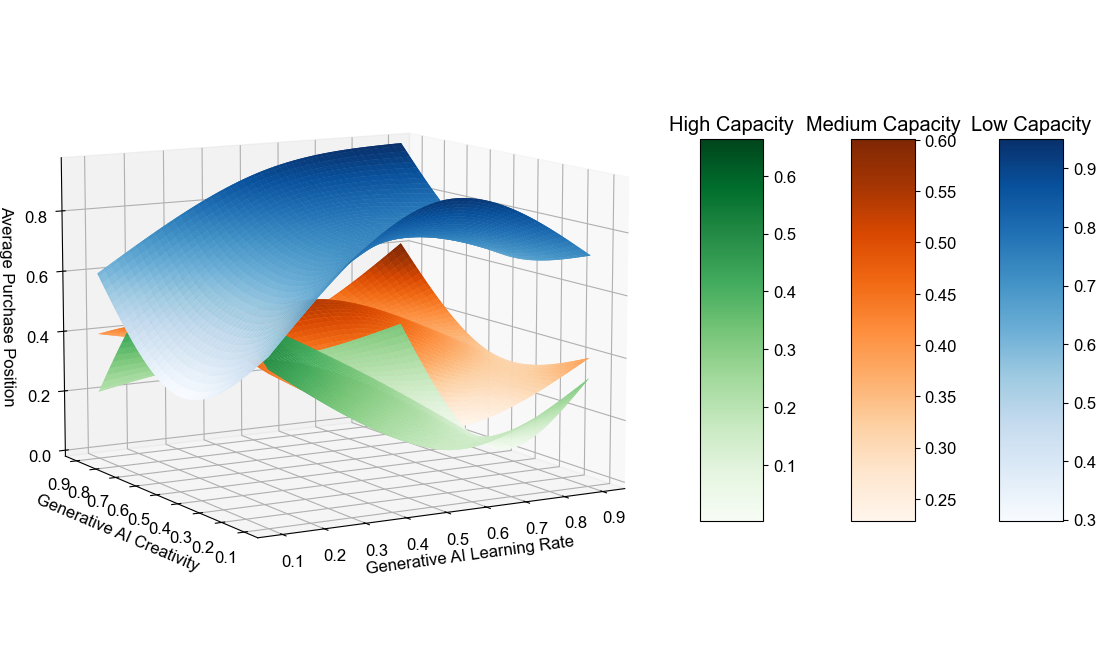

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.lines as mlines


fig = plt.figure(figsize=(12, 8)) 
ax = fig.add_subplot(111, projection='3d')

cmaps = ['Blues', 'Oranges', 'Greens'] # Different color maps for each category

# Loop through each learning rate condition
for i, rate in enumerate(['Capacity Low', 'Capacity Medium', 'Capacity High']):
    # Filtering data based on the learning rate
    subset = df_select[df_select[rate] == 1]

    # Extracting data for the axes
    x = subset['learning_rate_gen_ai']
    y = subset['creativity_gen_ai']
    z = subset['mean_purchase_position']

    # Creating a grid to interpolate
    xi = np.linspace(0.1, x.max(), 100)
    yi = np.linspace(0.1, y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='cubic')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Plotting the surface for each subset
    surf = ax.plot_surface(xi, yi, zi, cmap=cmaps[i], edgecolor='none')

    # Adding a color bar for each surface and setting a title for it
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=6, pad=0.03*i)
    cbar.ax.set_title(rate.split()[1]+ " Capacity")  # Set title for each color bar

ax.view_init(elev=10, azim=-120)


# Setting labels for each axis
ax.set_xlabel('Generative AI Learning Rate')
ax.set_ylabel('Generative AI Creativity')
ax.set_zlabel('Average Purchase Position')

# Inverting X axes
# ax.set_xlim(ax.get_xlim()[::-1])
#ax.set_ylim(ax.get_ylim()[::-1])
plt.tight_layout()

plot_title = "Interaction Effects of Learning Rate, Creativity and Capacity of Generative AI on Average Purchase Position.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight', dpi=300)

# Independent Effects of Learning Rate

In [27]:
print(plt.style.available)

data = data[data['capacity_gen_ai'] != 0]

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


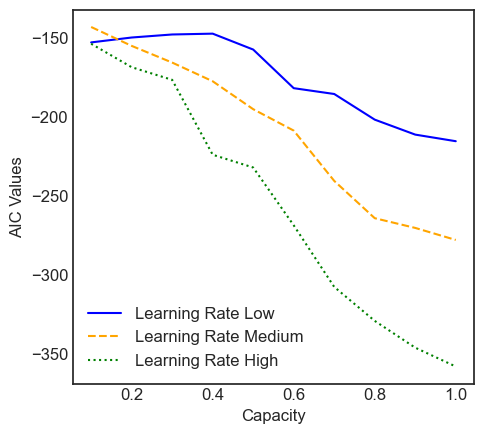

In [28]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')

line_styles = ['-', '--', ':']

# Create a new figure for plotting
plt.figure(figsize=(5, 4.5))

# Plot a line for each learning rate level
for rate_level, color, style in zip(['Learning Rate Low', 'Learning Rate Medium', 'Learning Rate High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding learning rate level
    subset = data[data[rate_level] == 1]

    # Calculate the average AIC for each level of capacity_gen_ai
    average_aic = subset.groupby('capacity_gen_ai')['aic_quartic_min_org'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=rate_level, color=color, linestyle=style)

# Add title and axis labels
plt.xlabel('Capacity')
plt.ylabel('AIC Values')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()

plot_title = "Effects of Generative AI Learning Rate on AIC Values.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight', dpi=300)

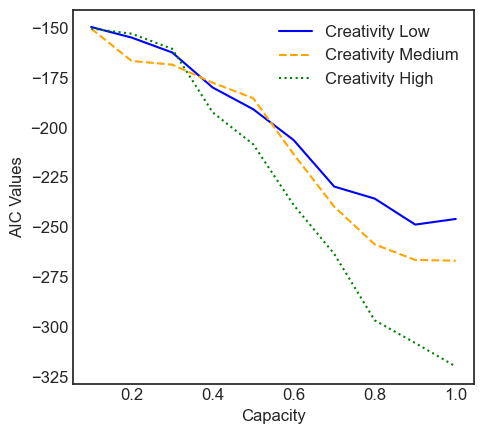

In [29]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')

df_select = data[data['learning_rate_gen_ai'] == 0]


# Create a new figure for plotting
plt.figure(figsize=(5, 4.5))

# Define line styles for different learning rate levels
line_styles = ['-', '--', ':']

# Plot a line for each creativity_gen_ai level
for creativity_level, color, style in zip(['Creativity Low', 'Creativity Medium', 'Creativity High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding creativity_gen_ai level
    subset = data[data[creativity_level] == 1]

    # Calculate the average AIC for each level of capacity_gen_ai
    average_aic = subset.groupby('capacity_gen_ai')['aic_quartic_min_org'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=creativity_level, color=color, linestyle=style)

# Add title and axis labels
plt.xlabel('Capacity')
plt.ylabel('AIC Values')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()

plot_title = "Effects of Generative AI Creativity on AIC Values.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight', dpi=300)

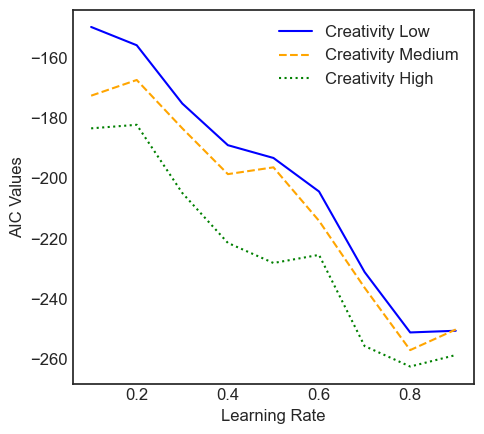

In [30]:
# Create a new figure for plotting
plt.figure(figsize=(5, 4.5))

# Define line styles for different learning rate levels
line_styles = ['-', '--', ':']

# Plot a line for each creativity_gen_ai level
for creativity_level, color, style in zip(['Creativity Low', 'Creativity Medium', 'Creativity High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding creativity_gen_ai level
    subset = data[data[creativity_level] == 1]

    # Calculate the average AIC for each level of capacity_gen_ai
    average_aic = subset.groupby('learning_rate_gen_ai')['aic_quartic_min_org'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=creativity_level, color=color, linestyle=style)

# Add title and axis labels
plt.xlabel('Learning Rate')
plt.ylabel('AIC Values')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()

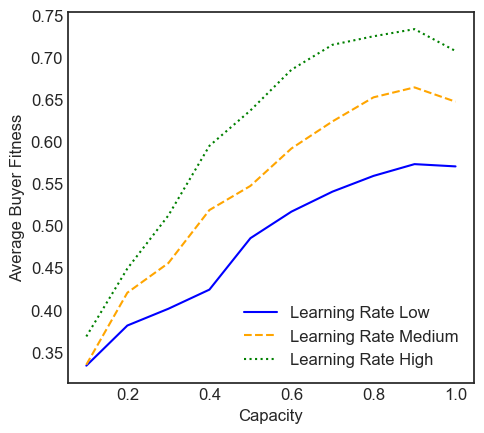

In [31]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')

df_select = data[data['creativity_gen_ai'] == 0.1]

line_styles = ['-', '--', ':']

# Create a new figure for plotting
plt.figure(figsize=(5, 4.5))

# Plot a line for each learning rate level
for rate_level, color, style in zip(['Learning Rate Low', 'Learning Rate Medium', 'Learning Rate High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding learning rate level
    subset = data[data[rate_level] == 1]

    # Calculate the average AIC for each level of capacity_gen_ai
    average_aic = subset.groupby('capacity_gen_ai')['avg_buyer_fitness'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=rate_level, color=color, linestyle=style)

# Add title and axis labels
plt.xlabel('Capacity')
plt.ylabel('Average Buyer Fitness')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()

plot_title = "Effects of Generative AI Learning Rate on Average Buyer Fitness.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight', dpi=300)

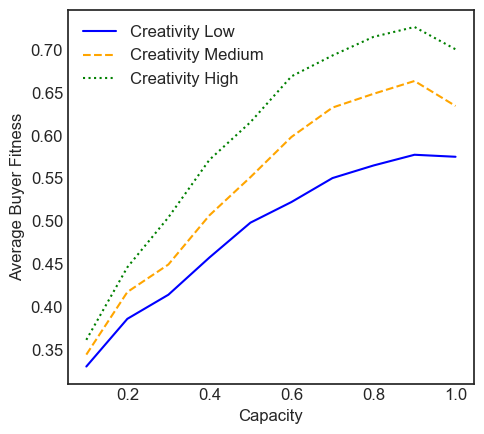

In [32]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')


# Create a new figure for plotting
plt.figure(figsize=(5, 4.5))

# Define line styles for different learning rate levels
line_styles = ['-', '--', ':']

# Plot a line for each creativity_gen_ai level
for creativity_level, color, style in zip(['Creativity Low', 'Creativity Medium', 'Creativity High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding creativity_gen_ai level
    subset = data[data[creativity_level] == 1]

    # Calculate the average AIC for each level of capacity_gen_ai
    average_aic = subset.groupby('capacity_gen_ai')['avg_buyer_fitness'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=creativity_level, color=color, linestyle=style)

# Add title and axis labels
plt.xlabel('Capacity')
plt.ylabel('Average Buyer Fitness')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()

plot_title = "Effects of Generative AI Creativity on Average Buyer Fitness.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight', dpi=300)

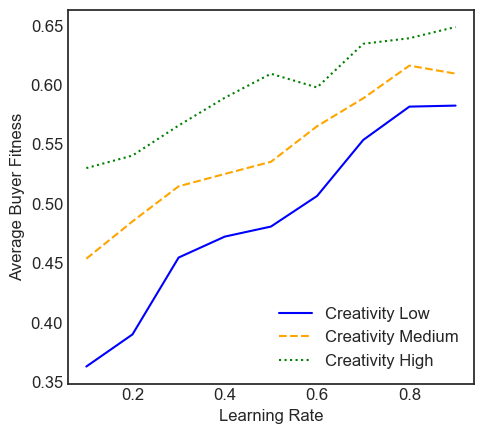

In [33]:
# Create a new figure for plotting
plt.figure(figsize=(5, 4.5))

# Define line styles for different learning rate levels
line_styles = ['-', '--', ':']

# Plot a line for each creativity_gen_ai level
for creativity_level, color, style in zip(['Creativity Low', 'Creativity Medium', 'Creativity High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding creativity_gen_ai level
    subset = data[data[creativity_level] == 1]

    # Calculate the average AIC for each level of capacity_gen_ai
    average_aic = subset.groupby('learning_rate_gen_ai')['avg_buyer_fitness'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=creativity_level, color=color, linestyle=style)

# Add title and axis labels
plt.xlabel('Learning Rate')
plt.ylabel('Average Buyer Fitness')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()

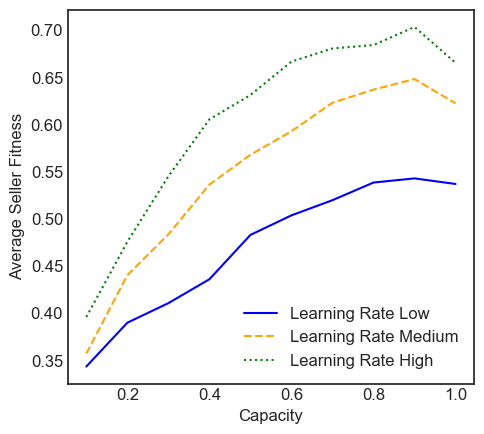

In [34]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')

line_styles = ['-', '--', ':']

# Create a new figure for plotting
plt.figure(figsize=(5, 4.5))

# Plot a line for each learning rate level
for rate_level, color, style in zip(['Learning Rate Low', 'Learning Rate Medium', 'Learning Rate High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding learning rate level
    subset = data[data[rate_level] == 1]

    # Calculate the average AIC for each level of capacity_gen_ai
    average_aic = subset.groupby('capacity_gen_ai')['avg_seller_fitness'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=rate_level, color=color, linestyle=style)

# Add title and axis labels
plt.xlabel('Capacity')
plt.ylabel('Average Seller Fitness')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()

plot_title = "Effects of Generative AI Learning Rate on Average Seller Fitness.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight', dpi=300)

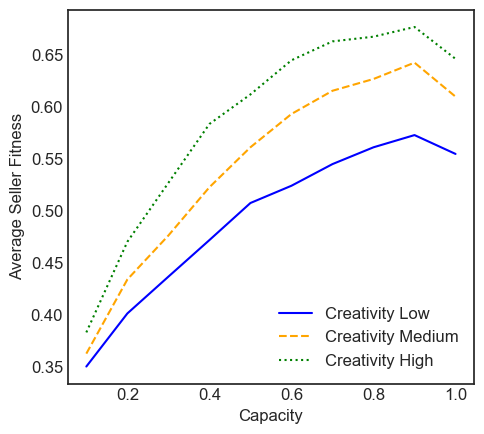

In [35]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')

# Create a new figure for plotting
plt.figure(figsize=(5, 4.5))

# Define line styles for different learning rate levels
line_styles = ['-', '--', ':']

# Plot a line for each creativity_gen_ai level
for creativity_level, color, style in zip(['Creativity Low', 'Creativity Medium', 'Creativity High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding creativity_gen_ai level
    subset = data[data[creativity_level] == 1]

    # Calculate the average AIC for each level of capacity_gen_ai
    average_aic = subset.groupby('capacity_gen_ai')['avg_seller_fitness'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=creativity_level, color=color, linestyle=style)

# Add title and axis labels
plt.xlabel('Capacity')
plt.ylabel('Average Seller Fitness')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()

plot_title = "Effects of Generative AI Creativity on Average Seller Fitness.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight', dpi=300)

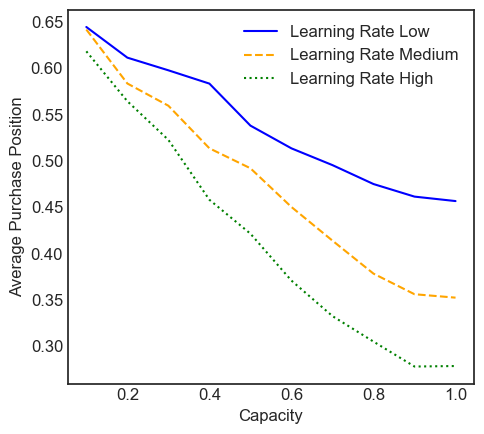

In [36]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')


line_styles = ['-', '--', ':']

# Create a new figure for plotting
plt.figure(figsize=(5, 4.5))

# Plot a line for each learning rate level
for rate_level, color, style in zip(['Learning Rate Low', 'Learning Rate Medium', 'Learning Rate High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding learning rate level
    subset = data[data[rate_level] == 1]

    # Calculate the average AIC for each level of capacity_gen_ai
    average_aic = subset.groupby('capacity_gen_ai')['mean_purchase_position'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=rate_level, color=color, linestyle=style)

# Add title and axis labels
plt.xlabel('Capacity')
plt.ylabel('Average Purchase Position')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()

plot_title = "Effects of Generative AI Learning Rate on Average Purchase Position.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight', dpi=300)

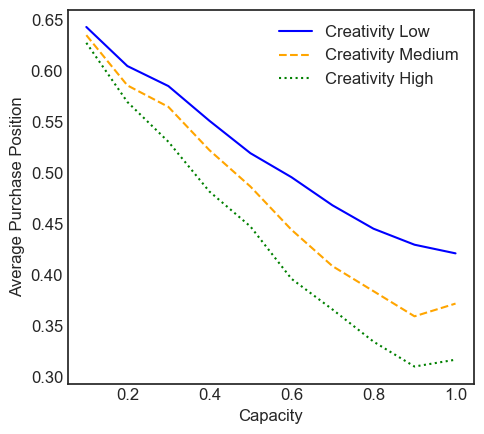

In [37]:
# Set the plotting style
plt.style.use('seaborn-v0_8-white')


# Create a new figure for plotting
plt.figure(figsize=(5, 4.5))

# Define line styles for different learning rate levels
line_styles = ['-', '--', ':']

# Plot a line for each creativity_gen_ai level
for creativity_level, color, style in zip(['Creativity Low', 'Creativity Medium', 'Creativity High'], ['blue', 'orange', 'green'], line_styles):
    # Filter data for the corresponding creativity_gen_ai level
    subset = data[data[creativity_level] == 1]

    # Calculate the average AIC for each level of capacity_gen_ai
    average_aic = subset.groupby('capacity_gen_ai')['mean_purchase_position'].mean()

    # Plot the line
    plt.plot(average_aic.index, average_aic.values, label=creativity_level, color=color, linestyle=style)

# Add title and axis labels
plt.xlabel('Capacity')
plt.ylabel('Average Purchase Position')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()

plot_title = "Effects of Generative AI Creativity on Average Purchase Position.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight', dpi=300)

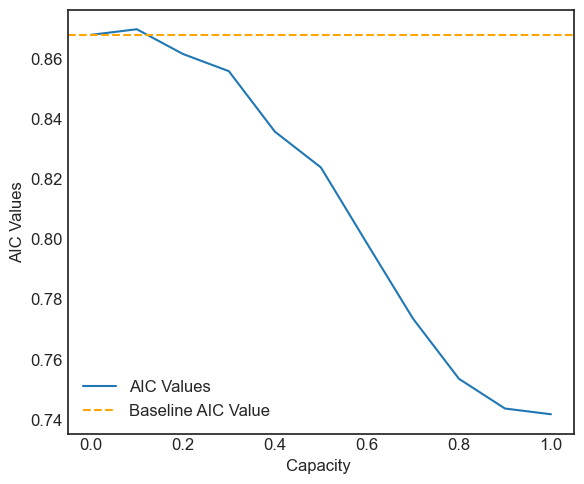

In [38]:
df_extended['AIC Quartic (Minimum) Original'] = df_extended['AIC Quartic (Minimum)']
columns_to_scale = ['Average Satisfaction', 'mean_purchase_position','percentage_willing_to_share_info', 'num_customers', 'num_retailers', 'num_products', 'AIC Quartic (Sum)', 'AIC Quartic (Minimum)', 'Average Seller Rating', 'capacity_gen_ai']
scaler = MinMaxScaler()
df_extended[columns_to_scale] = scaler.fit_transform(df_extended[columns_to_scale])
data_normalized_df_v2 = df_extended

grouped_df_test = data_normalized_df_v2.groupby(['capacity_gen_ai']).agg({
    'AIC Quartic (Sum)': 'mean',
    'AIC Quartic (Minimum)': 'mean',
    'Average Satisfaction': 'mean',
    'Average Seller Rating': 'mean',
}).reset_index()

plt.figure(figsize=(6, 5))
plt.plot(grouped_df_test['capacity_gen_ai'], grouped_df_test['AIC Quartic (Minimum)'], label='AIC Values')
plt.xlabel('Capacity ')
plt.ylabel('AIC Values')

baseline_value = grouped_df_test[grouped_df_test['capacity_gen_ai'] == 0]['AIC Quartic (Minimum)'].iloc[0]
plt.axhline(y=baseline_value, color='orange', linestyle='--', label='Baseline AIC Value')

plt.legend()

plt.tight_layout()

plot_title = "AIC Values by Capacity of Generative AI.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight', dpi=300)

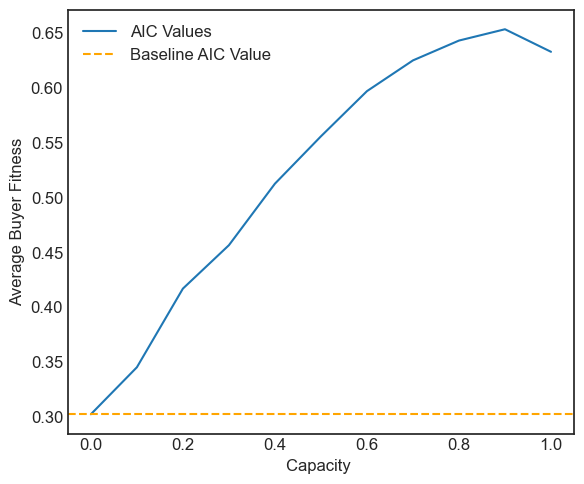

In [39]:
grouped_df_test = data_normalized_df.groupby(['capacity_gen_ai']).agg({
    'AIC Quartic (Sum)': 'mean',
    'AIC Quartic (Minimum)': 'mean',
    'Average Satisfaction': 'mean',
    'Average Seller Rating': 'mean',
}).reset_index()

plt.figure(figsize=(6, 5))
plt.plot(grouped_df_test['capacity_gen_ai'], grouped_df_test['Average Satisfaction'], label='AIC Values')
plt.xlabel('Capacity ')
plt.ylabel('Average Buyer Fitness')

baseline_value = grouped_df_test[grouped_df_test['capacity_gen_ai'] == 0]['Average Satisfaction'].iloc[0]
plt.axhline(y=baseline_value, color='orange', linestyle='--', label='Baseline AIC Value')

plt.legend()

plt.tight_layout()

plot_title = "Average Buyer Fitness by Capacity of Generative AI.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight', dpi=300)

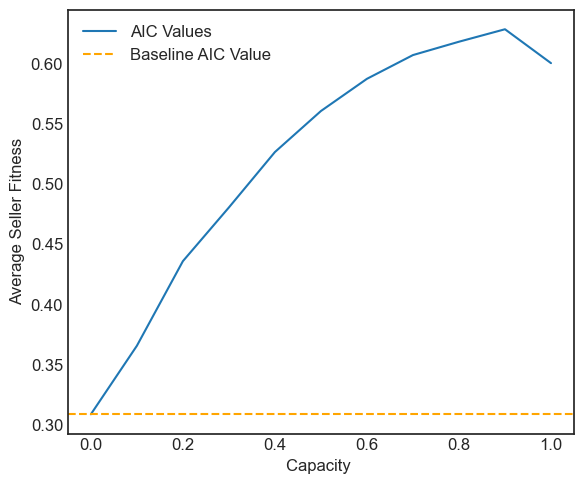

In [40]:
grouped_df_test = data_normalized_df.groupby(['capacity_gen_ai']).agg({
    'AIC Quartic (Sum)': 'mean',
    'AIC Quartic (Minimum)': 'mean',
    'Average Satisfaction': 'mean',
    'Average Seller Rating': 'mean',
}).reset_index()

plt.figure(figsize=(6, 5))
plt.plot(grouped_df_test['capacity_gen_ai'], grouped_df_test['Average Seller Rating'], label='AIC Values')
plt.xlabel('Capacity ')
plt.ylabel('Average Seller Fitness')

baseline_value = grouped_df_test[grouped_df_test['capacity_gen_ai'] == 0]['Average Seller Rating'].iloc[0]
plt.axhline(y=baseline_value, color='orange', linestyle='--', label='Baseline AIC Value')

plt.legend()

plt.tight_layout()

plot_title = "Average Seller Fitness by Capacity of Generative AI.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight', dpi=300)

# AIC Value Comparison

In [41]:
plot_dir = "../plots/"


filename_33 = "../simulation_single_ca0.3_lr0.3.csv"
df_33 = pd.read_csv(filename_33)


filename_00 = "../simulation_single_ca0_lr0.csv"
df_00 = pd.read_csv(filename_00)

filename_39 = "../simulation_single_ca0.3_lr0.9.csv"
df_39 = pd.read_csv(filename_39)

filename_93 = "../simulation_single_ca0.9_lr0.3.csv"
df_93 = pd.read_csv(filename_93)

filename_99 = "../simulation_single_0.9_0.9.csv"
df_99 = pd.read_csv(filename_99)

df_99 = df_99[df_99['AIC Quartic (Sum)'] >= -450]

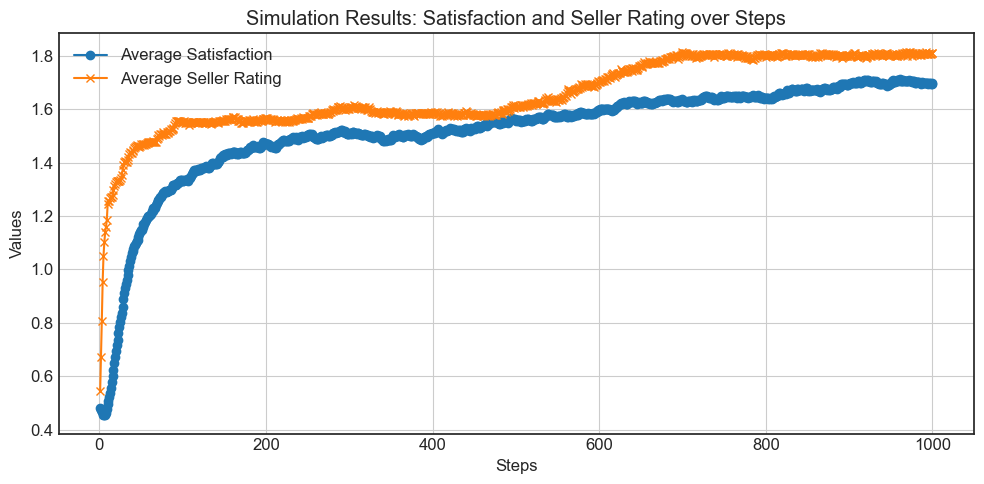

In [42]:
plt.figure(figsize=(10, 5))

plt.plot(df_00["steps"], df_00["Average Satisfaction"], label="Average Satisfaction", marker='o')
plt.plot(df_00["steps"], df_00["Average Seller Rating"], label="Average Seller Rating", marker='x')

plt.xlabel("Steps")
plt.ylabel("Values")
plt.title("Simulation Results: Satisfaction and Seller Rating over Steps")
plt.legend()

plt.grid(True)
plt.tight_layout()

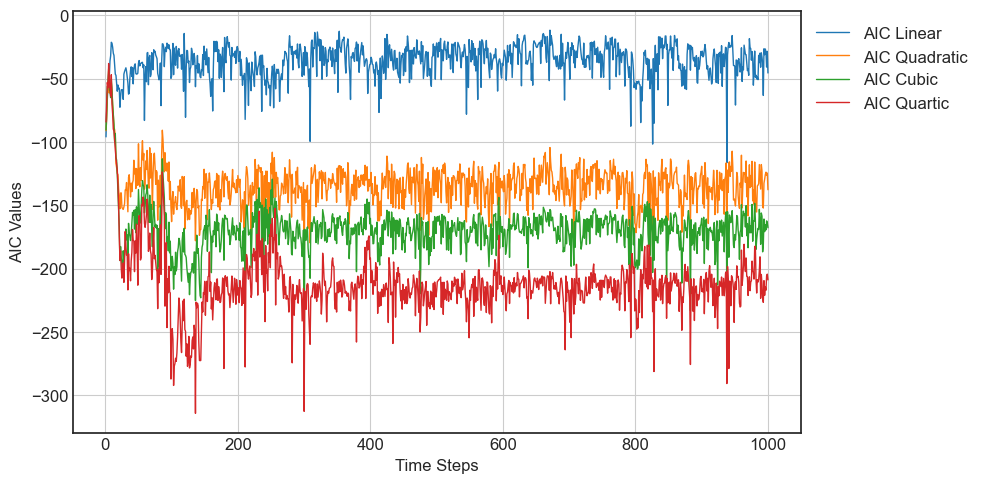

In [43]:
plt.figure(figsize=(10, 5))

plt.plot(df_93["steps"], df_93["AIC Linear (Sum)"], label="AIC Linear", linewidth=1)
plt.plot(df_93["steps"], df_93["AIC Quadratic (Sum)"], label="AIC Quadratic", linewidth=1)
plt.plot(df_93["steps"], df_93["AIC Cubic (Sum)"], label="AIC Cubic", linewidth=1)
plt.plot(df_93["steps"], df_93["AIC Quartic (Sum)"], label="AIC Quartic", linewidth=1)

plt.xlabel("Time Steps")
plt.ylabel("AIC Values")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.tight_layout()

plot_title = "AIC Values Comparison.png"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight', dpi=300)

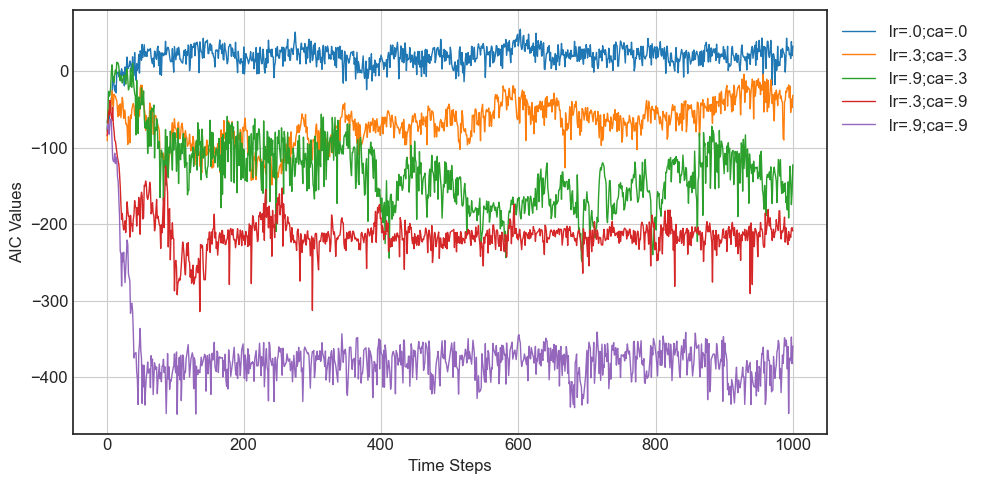

In [44]:
plt.figure(figsize=(10, 5))

plt.plot(df_00["steps"], df_00["AIC Quartic (Sum)"], label="lr=.0;ca=.0", linewidth=1)
plt.plot(df_33["steps"], df_33["AIC Quartic (Sum)"], label="lr=.3;ca=.3", linewidth=1)
plt.plot(df_39["steps"], df_39["AIC Quartic (Sum)"], label="lr=.9;ca=.3", linewidth=1)
plt.plot(df_93["steps"], df_93["AIC Quartic (Sum)"], label="lr=.3;ca=.9", linewidth=1)
plt.plot(df_99["steps"], df_99["AIC Quartic (Sum)"], label="lr=.9;ca=.9", linewidth=1)


plt.xlabel("Time Steps")
plt.ylabel("AIC Values")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.tight_layout()

plot_title = "Effect of Learning Rate and Capacity of Generative AI on the AIC Values of E-Commerce Platform"

# Constructing the full path
plot_filename = os.path.join(plot_dir, plot_title)

# Now you can save the plot to the constructed path
plt.savefig(plot_filename, bbox_inches='tight', dpi=300)